## Iris Task

### Preparing the libraries we need

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist, squareform

### The dataset is an object so we need to explore its keys to be able to understand it

In [36]:
iris =datasets.load_iris()
print(f"keys of iris dataset:\n{iris.keys()}")
print(iris["DESCR"][:500] + "\n")

keys of iris dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                




### Printing the classes we have in the dataset and the names of the columns we have

In [37]:
print(f"Target names:{iris['target_names']}")
print(f"Feature names:{iris['feature_names']}")

Target names:['setosa' 'versicolor' 'virginica']
Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### The target column is encoded into numbers
##### "0" means Iris-Setosa
##### "1" means Iris-Versicolour
##### "2" means Iris-Virginica

In [38]:
print(f"Target:{iris['target']}")

Target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### To make the data easier to understand we convert it into dataframe

In [39]:
data=pd.DataFrame(iris.data,columns=iris["feature_names"])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Some info and statistical info about the dataset

In [40]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

### The scatter matrix of the data

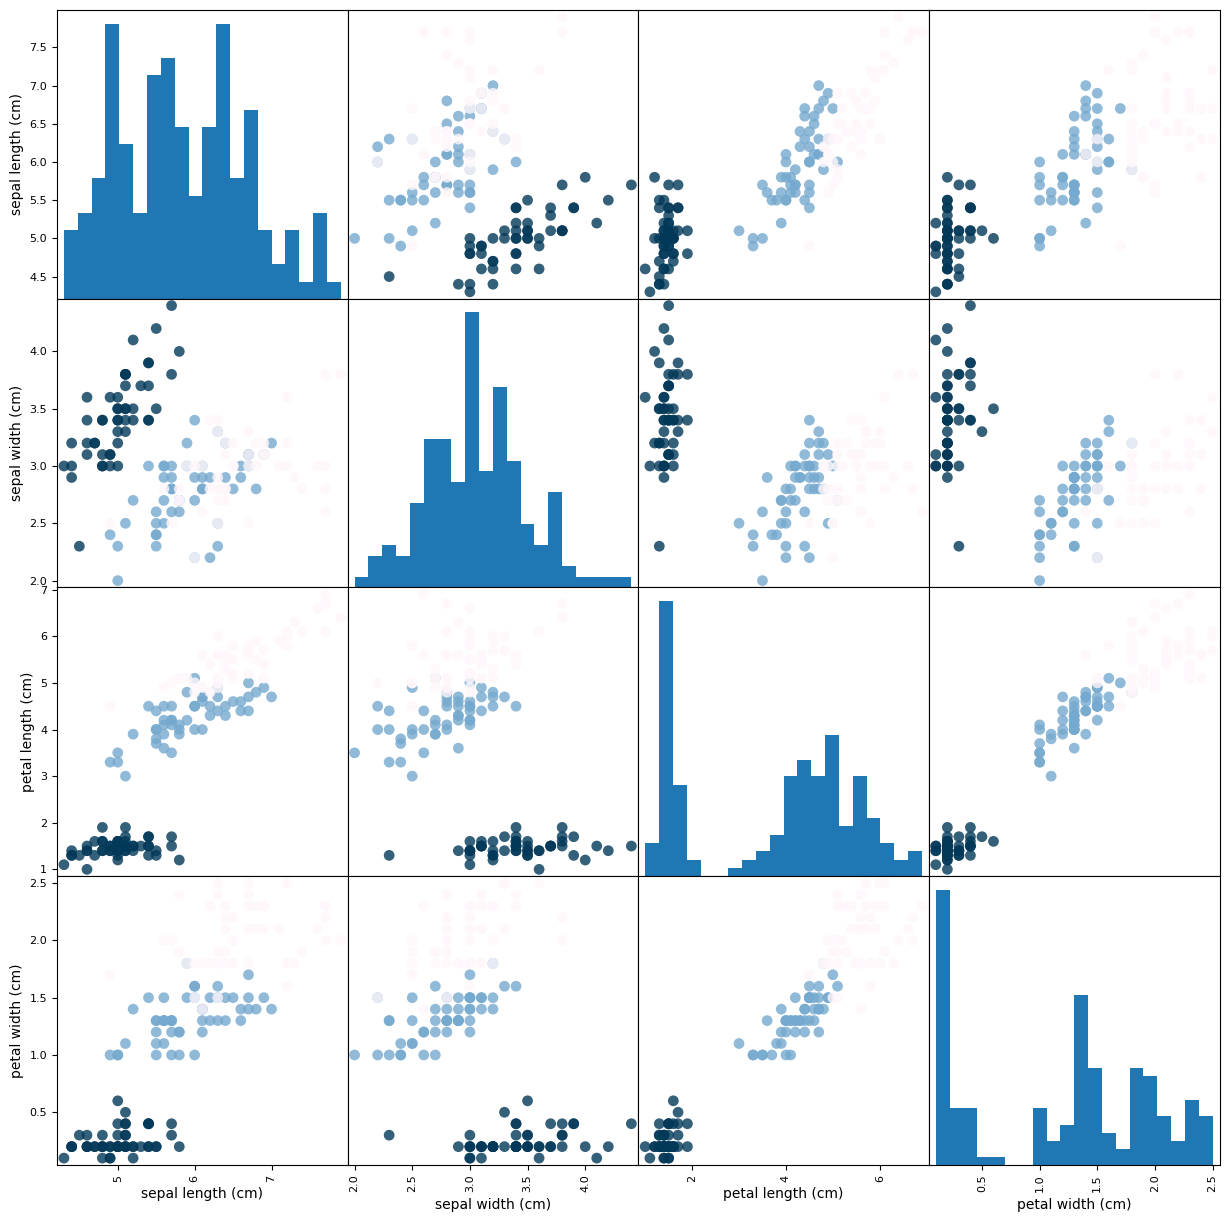

In [41]:
plot=pd.plotting.scatter_matrix(data,c=iris["target"],figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap='PuBu_r') 

### We add the target column and change the encoded values back to its string form

In [42]:
data['target'] = iris.target
for x in range(len(iris.target_names)):
  data.loc[data[data['target']==x].index,'target']=iris.target_names[x]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Now we have to make a boxplot for each column except for the target column

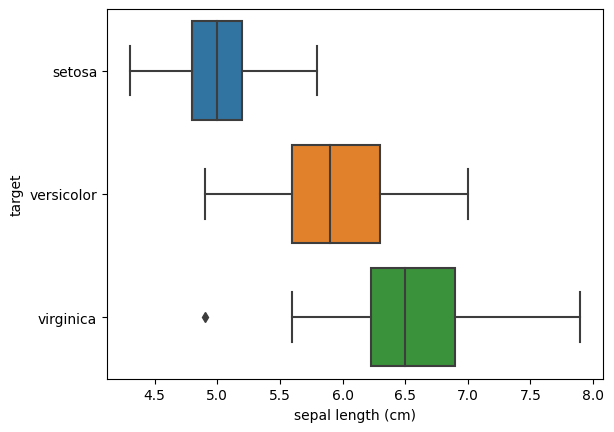

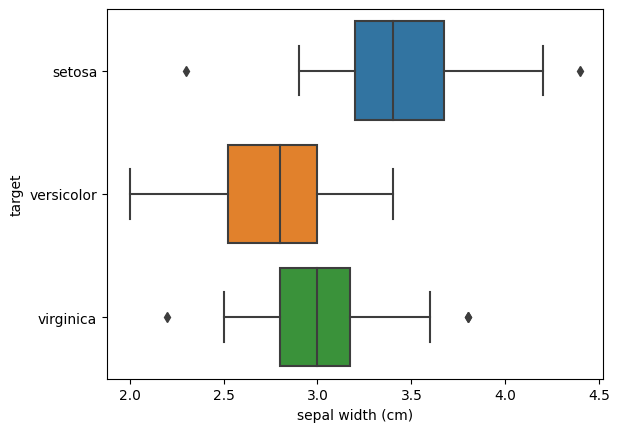

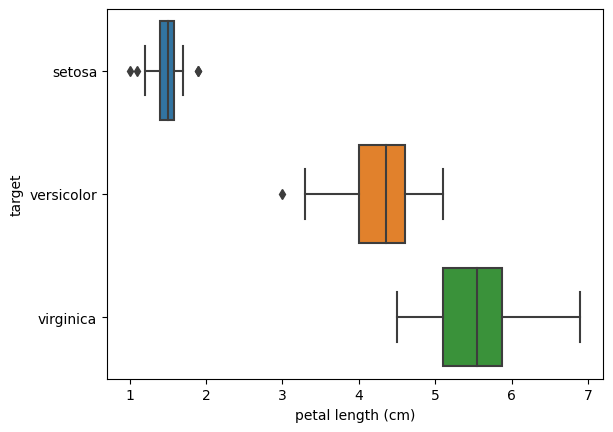

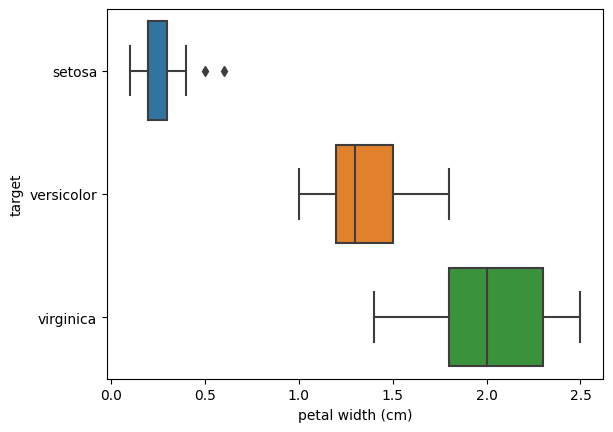

In [43]:
for x in data.columns:
  if x != 'target':
    sns.boxplot(data=data,x=x,y='target')
    plt.show()

### Creating a matrix using the euclidean distance and nomralizing it to be between 0 and 1

In [44]:
euclidean_distances = pdist(data.iloc[:,:len(data.columns)-1].values, metric='euclidean')
euclidean_distances = (euclidean_distances-np.min(euclidean_distances))/np.max(euclidean_distances)
dissimilarity_matrix = squareform(euclidean_distances)

### plot the dissimilarity matrix

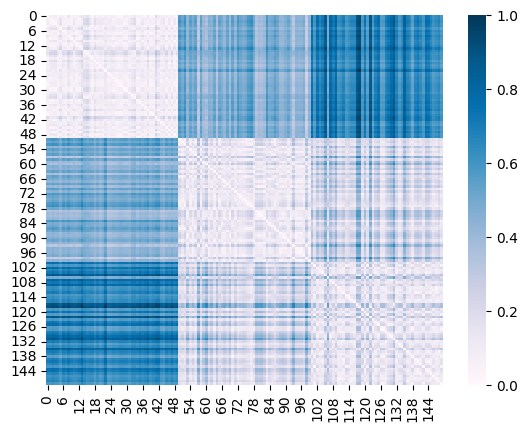

In [45]:
sns.heatmap(dissimilarity_matrix, cmap='PuBu', cbar=True)
plt.show()

### We change our dissimilarity matrix to a dataframe to export it

In [46]:
dissimilarity_m_new = pd.DataFrame(dissimilarity_matrix)
dissimilarity_m_new

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.076006,0.071967,0.091469,0.019960,0.087004,0.073338,0.024446,0.130124,0.066200,...,0.708514,0.654436,0.593960,0.742023,0.724912,0.656867,0.603608,0.629456,0.656412,0.584324
1,0.076006,0.000000,0.042342,0.046811,0.085852,0.153965,0.071967,0.059880,0.071967,0.024446,...,0.715926,0.663655,0.590091,0.750962,0.734874,0.663355,0.599801,0.634970,0.665903,0.586196
2,0.071967,0.042342,0.000000,0.034572,0.071967,0.153317,0.037342,0.058193,0.061521,0.044632,...,0.737985,0.687104,0.611803,0.772794,0.755590,0.686524,0.625329,0.657927,0.684344,0.606735
3,0.091469,0.046811,0.034572,0.000000,0.091469,0.164595,0.046811,0.070570,0.042342,0.044632,...,0.720502,0.671859,0.589584,0.755063,0.738524,0.669780,0.605256,0.639814,0.666052,0.585686
4,0.019960,0.085852,0.071967,0.091469,0.000000,0.087004,0.064678,0.031560,0.130124,0.074684,...,0.714394,0.661400,0.599302,0.747639,0.730115,0.663505,0.611151,0.635754,0.660345,0.589077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.656867,0.663355,0.686524,0.669780,0.663505,0.604762,0.677028,0.649088,0.693596,0.658684,...,0.059880,0.034572,0.145996,0.103716,0.087004,0.000000,0.110233,0.050889,0.094679,0.133897
146,0.603608,0.599801,0.625329,0.605256,0.611151,0.562967,0.618764,0.592785,0.625169,0.595635,...,0.150033,0.133151,0.077305,0.184564,0.181297,0.110233,0.000000,0.082298,0.150696,0.092551
147,0.629456,0.634970,0.657927,0.639814,0.635754,0.579016,0.648320,0.620692,0.663505,0.629140,...,0.085852,0.073338,0.109326,0.118926,0.112026,0.050889,0.082298,0.000000,0.087004,0.090373
148,0.656412,0.665903,0.684344,0.666052,0.660345,0.601956,0.670375,0.647705,0.689997,0.659440,...,0.088142,0.115528,0.133897,0.113790,0.088142,0.094679,0.150696,0.087004,0.000000,0.108411


### Making a k_nearest_neighbour (KNN) model

In [48]:
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,:len(data.columns)-1],iris['target'])

In [49]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9736842105263158


### Exporting the dissimilarity matrix to a csv file

In [ ]:
dissimilarity_m_new.to_csv('dissimilarity.csv',index=False)